In [2]:
import torch
import time 

import torchvision as tv 
import matplotlib.pyplot as plt

In [3]:
#loading dataset
BATCH_SIZE = 256 

train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)

train = torch.utils.data.DataLoader(train_dataset, batch_size = BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size = BATCH_SIZE)

In [9]:
def train_model():
    for ep in range(num_epochs + 1):
        train_iters, train_passed = 0, 0
        train_loss, train_acc = 0., 0. 
        start = time.time()
        
        model.train()
        for X, y in train:
            trainer.zero_grad()
            y_pred = model(X)
            l = loss(y_pred, y)
            l.backward()
            trainer.step()
            train_loss += l.item()
            train_acc += (y_pred.argmax(axis=1) == y).sum().item()
            train_iters += 1
            train_passed += len(X)
        
        test_iters, test_passed = 0, 0
        test_loss, test_acc = 0., 0. 
        model.eval()
        for X, y in test:
            y_pred = model(X)
            l = loss(y_pred, y)
            test_loss += l.item()
            test_acc += (y_pred.argmax(axis=1) == y).sum().item()
            test_iters += 1
            test_passed += len(X)
        
        print('ep: {}, taked: {:.3f}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}'.format(
        ep, time.time() - start, train_loss / train_iters, train_acc / train_passed, 
        test_loss / test_iters, test_acc / test_passed)
             )
            

## Model 

torch.Size([1, 28, 28])


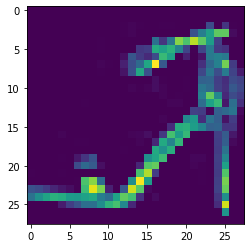

In [4]:
for X, y in train:
    print(X[1].shape)
    plt.imshow(X[8][0])
    break

In [11]:
model = torch.nn.Sequential(
    torch.nn.Conv2d(1, 32, kernel_size=3),
    torch.nn.ReLU(), 
    torch.nn.MaxPool2d(2, stride=2),
    torch.nn.Flatten(),
    torch.nn.Linear(5408, 50), 
    torch.nn.ReLU(),
    torch.nn.Linear(50, 10)
)

In [12]:
model

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): Linear(in_features=5408, out_features=50, bias=True)
  (5): ReLU()
  (6): Linear(in_features=50, out_features=10, bias=True)
)

In [13]:
for X, y in train:
    print(X[0].shape, y[0].shape)
    break

torch.Size([1, 28, 28]) torch.Size([])


In [14]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=0.006)
num_epochs = 10

In [15]:
train_model()

ep: 0, taked: 20.105, train_loss: 0.5391868136030562, train_acc: 0.8118, test_loss: 0.37143104150891304, test_acc: 0.8703
ep: 1, taked: 18.386, train_loss: 0.3098188206236413, train_acc: 0.8891666666666667, test_loss: 0.33460276685655116, test_acc: 0.8788
ep: 2, taked: 18.472, train_loss: 0.2670338399232702, train_acc: 0.9027833333333334, test_loss: 0.32800946608185766, test_acc: 0.8802
ep: 3, taked: 18.862, train_loss: 0.23856534742294475, train_acc: 0.9132666666666667, test_loss: 0.3169697463512421, test_acc: 0.8846
ep: 4, taked: 18.753, train_loss: 0.2174053869982983, train_acc: 0.9203333333333333, test_loss: 0.31543664932250975, test_acc: 0.8873
ep: 5, taked: 18.890, train_loss: 0.20014348302749876, train_acc: 0.92705, test_loss: 0.3321792419999838, test_acc: 0.8863
ep: 6, taked: 19.547, train_loss: 0.18565151168310895, train_acc: 0.9318833333333333, test_loss: 0.34739667922258377, test_acc: 0.8854
ep: 7, taked: 19.331, train_loss: 0.17440899467848717, train_acc: 0.9352833333333334